In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
total_dep_score = pd.read_csv('../data/0&1/total_dep_score.csv')

X_t = total_dep_score.copy()
del X_t['dep_score']

y_t = total_dep_score['dep_score']

In [3]:
y_t.value_counts() 

0.0    2339
1.0     704
Name: dep_score, dtype: int64

In [4]:
2339 / (2339 + 704) 

0.7686493591850148

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             2          1          1          1        2        3
2             3          3          3          1        2        2
3             1          2          1          1        1        2
4             2          3          0          0        2        2
...         ...        ...        ...        ...      ...      ...
3038          3          3          2          2        2        3
3039          2          3          1          1        1        2
3040          0          0          0          0        2        0
3041          2          3          1          1        1        2
3042          1          2          2          2        0        1

[3043 rows x 6 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3038    0.0
3039    0.0
3040    0.0
3041    1.0
3042    0.0
Name: dep_score, Length: 3043, dtype: f

In [6]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_dep_score.csv')

X_s = sampled_dep_score.copy()
del X_s['dep_score']

y_s = sampled_dep_score['dep_score']

In [7]:
y_s.value_counts()

1.0    704
0.0    704
Name: dep_score, dtype: int64

In [8]:
print(X_s)
print(y_s)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             1          1          1          1        1        2
2             1          2          0          0        1        1
3             3          3          2          2        2        1
4             2          2          3          3        2        2
...         ...        ...        ...        ...      ...      ...
1403          3          3          2          2        2        1
1404          2          1          1          1        2        2
1405          2          1          1          1        1        2
1406          2          3          0          0        2        3
1407          3          3          2          3        1        2

[1408 rows x 6 columns]
0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1403    1.0
1404    0.0
1405    1.0
1406    0.0
1407    1.0
Name: dep_score, Length: 1408, dtype: f

## SVM

## Seed == 100

In [10]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [10]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    3.6s


best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.7776560788608982
F1 score micro: 0.777656078860898
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       710
         1.0       0.00      0.00      0.00       203

    accuracy                           0.78       913
   macro avg       0.39      0.50      0.44       913
weighted avg       0.60      0.78      0.68       913



[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:  1.1min finished
C:\Users\parkj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


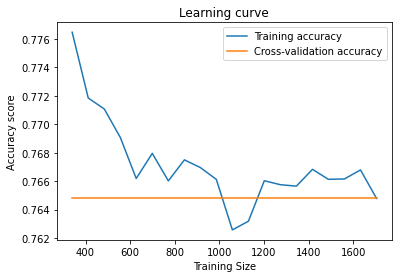

In [11]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [12]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [13]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    3.6s


best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.7546549835706462
F1 score micro: 0.7546549835706462
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       689
         1.0       0.00      0.00      0.00       224

    accuracy                           0.75       913
   macro avg       0.38      0.50      0.43       913
weighted avg       0.57      0.75      0.65       913



[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   28.9s finished
C:\Users\parkj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


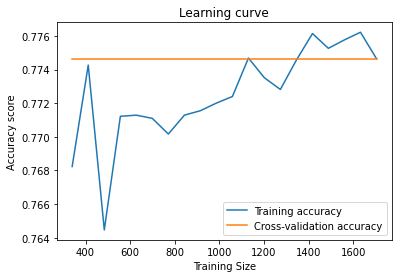

In [13]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [14]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [16]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   39.7s finished


best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.7864184008762322
F1 score micro: 0.7864184008762322
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       720
         1.0       0.00      0.00      0.00       193

    accuracy                           0.79       913
   macro avg       0.39      0.50      0.44       913
weighted avg       0.62      0.79      0.69       913



[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


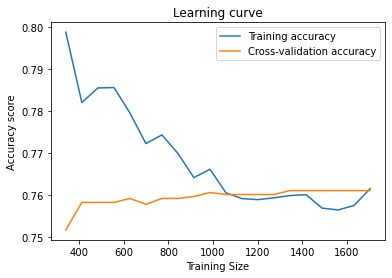

In [15]:
plot_model = svm.SVC(kernel='rbf', C=10.0, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [18]:
# learning curve considering different seeds 

In [16]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

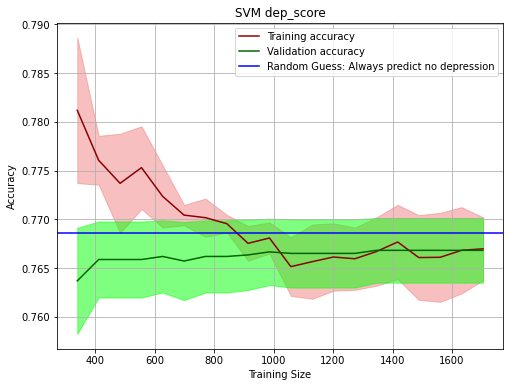

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## Logistic Regression

## Seed 100

In [18]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [22]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    4.5s


best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7776560788608982
F1 score micro: 0.777656078860898
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.87       710
         1.0       0.00      0.00      0.00       203

    accuracy                           0.78       913
   macro avg       0.39      0.50      0.44       913
weighted avg       0.60      0.78      0.68       913



[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    5.7s finished
C:\Users\parkj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


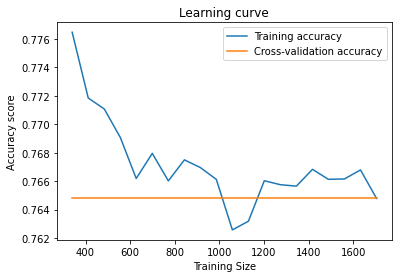

In [19]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [20]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [25]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:    4.9s


best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7546549835706462
F1 score micro: 0.7546549835706462
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       689
         1.0       0.00      0.00      0.00       224

    accuracy                           0.75       913
   macro avg       0.38      0.50      0.43       913
weighted avg       0.57      0.75      0.65       913



[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    5.2s finished
C:\Users\parkj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


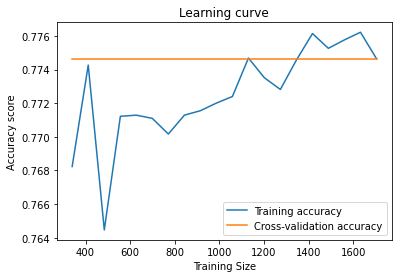

In [21]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [22]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [28]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    5.0s finished


best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7886089813800657
F1 score micro: 0.7886089813800657
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       720
         1.0       0.00      0.00      0.00       193

    accuracy                           0.79       913
   macro avg       0.39      0.50      0.44       913
weighted avg       0.62      0.79      0.70       913



C:\Users\parkj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


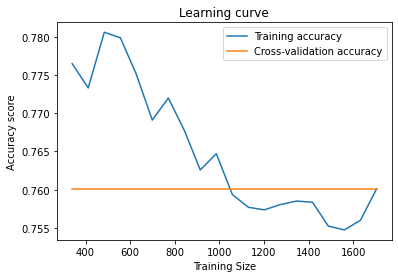

In [23]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [30]:
# learning curve considering different seeds 

In [24]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

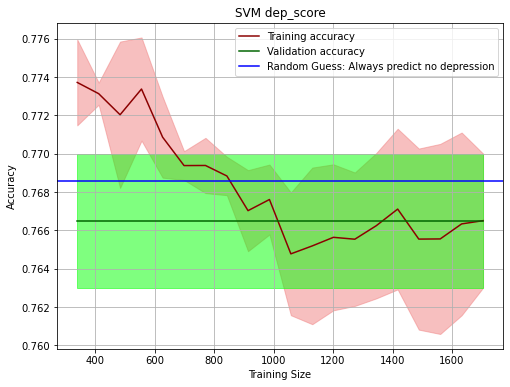

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## KNN

## Seed 100

In [26]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [34]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.4s


best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}
Accuracy: 0.7480832420591457
F1 score micro: 0.7480832420591457
F1 score binary: 0.08730158730158731

classification report:
               precision    recall  f1-score   support

         0.0       0.78      0.95      0.85       710
         1.0       0.22      0.05      0.09       203

    accuracy                           0.75       913
   macro avg       0.50      0.50      0.47       913
weighted avg       0.65      0.75      0.68       913



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.2s finished


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


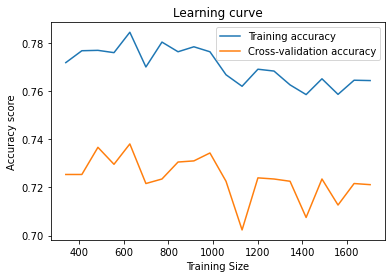

In [27]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [28]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [37]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.4s


best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}
Accuracy: 0.7360350492880613
F1 score micro: 0.7360350492880612
F1 score binary: 0.0694980694980695

classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.96      0.85       689
         1.0       0.26      0.04      0.07       224

    accuracy                           0.74       913
   macro avg       0.51      0.50      0.46       913
weighted avg       0.63      0.74      0.66       913



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.1s finished


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


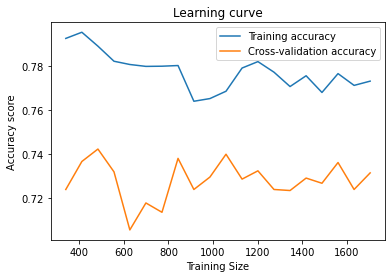

In [29]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [30]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [40]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.6s


best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 56, 'weights': 'uniform'}
Accuracy: 0.7656078860898138
F1 score micro: 0.7656078860898138
F1 score binary: 0.05309734513274336

classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.96      0.87       720
         1.0       0.18      0.03      0.05       193

    accuracy                           0.77       913
   macro avg       0.48      0.50      0.46       913
weighted avg       0.66      0.77      0.69       913



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.5s finished


[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


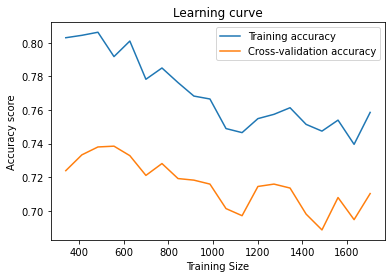

In [31]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=56, weights='uniform')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [42]:
# learning curve considering different seeds 

In [32]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

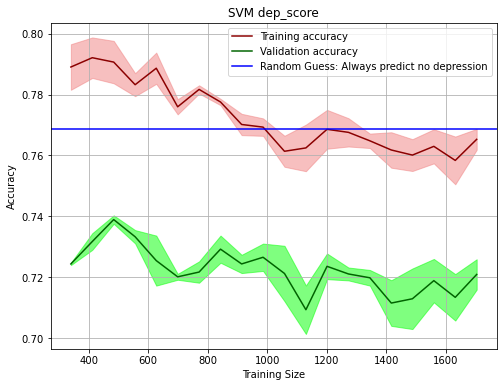

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## Random Forest

## Seed 100

In [ ]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=27)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [ ]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=27)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [ ]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=27)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [ ]:
# learning curve considering different seeds 

In [ ]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# 2. sampled

# SVM 

## Seed 100

In [34]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [85]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 116 tasks      | elapsed:    3.5s


best hyper parameters {'C': 10.0, 'gamma': 0.01, 'kernel': 'sigmoid'}
Accuracy: 0.5555555555555556
F1 score micro: 0.5555555555555556
F1 score binary: 0.5323383084577115

classification report:
               precision    recall  f1-score   support

         0.0       0.56      0.59      0.58       216
         1.0       0.55      0.52      0.53       207

    accuracy                           0.56       423
   macro avg       0.56      0.55      0.55       423
weighted avg       0.56      0.56      0.55       423



[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    8.7s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


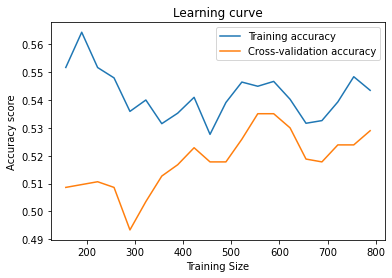

In [35]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.01)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [36]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [88]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 130 tasks      | elapsed:    3.6s


best hyper parameters {'C': 10.0, 'gamma': 0.01, 'kernel': 'sigmoid'}
Accuracy: 0.5437352245862884
F1 score micro: 0.5437352245862884
F1 score binary: 0.4853333333333334

classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.66      0.59       211
         1.0       0.56      0.43      0.49       212

    accuracy                           0.54       423
   macro avg       0.55      0.54      0.54       423
weighted avg       0.55      0.54      0.54       423



[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    8.7s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


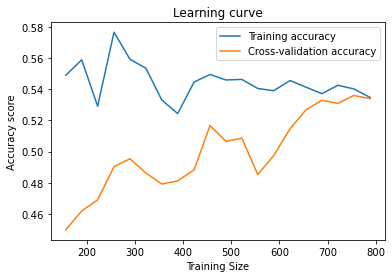

In [37]:
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.01)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [38]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [91]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 130 tasks      | elapsed:    3.6s


best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.48936170212765956
F1 score micro: 0.48936170212765956
F1 score binary: 0.4953271028037384

classification report:
               precision    recall  f1-score   support

         0.0       0.49      0.48      0.48       211
         1.0       0.49      0.50      0.50       212

    accuracy                           0.49       423
   macro avg       0.49      0.49      0.49       423
weighted avg       0.49      0.49      0.49       423



[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    8.7s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


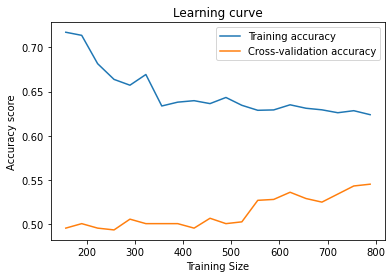

In [39]:
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [93]:
# learning curve considering different seeds 

In [40]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

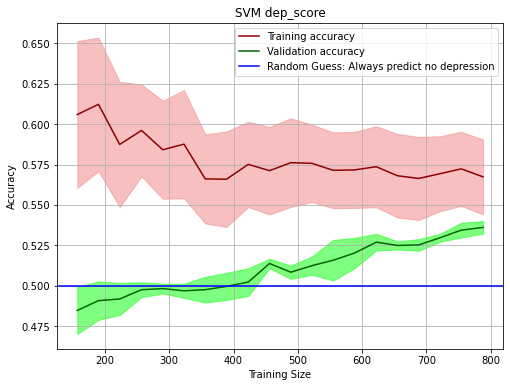

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# Logistic Regression

## Seed 100

In [42]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [97]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.541371158392435
F1 score micro: 0.541371158392435
F1 score binary: 0.5051020408163265

classification report:
               precision    recall  f1-score   support

         0.0       0.55      0.60      0.57       216
         1.0       0.54      0.48      0.51       207

    accuracy                           0.54       423
   macro avg       0.54      0.54      0.54       423
weighted avg       0.54      0.54      0.54       423



[Parallel(n_jobs=-1)]: Done 1957 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    3.7s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


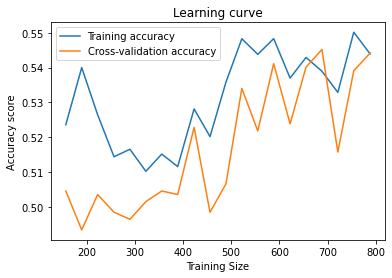

In [43]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [44]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [100]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5342789598108747
F1 score micro: 0.5342789598108747
F1 score binary: 0.5253012048192771

classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.55      0.54       211
         1.0       0.54      0.51      0.53       212

    accuracy                           0.53       423
   macro avg       0.53      0.53      0.53       423
weighted avg       0.53      0.53      0.53       423



[Parallel(n_jobs=-1)]: Done 1957 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    3.7s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


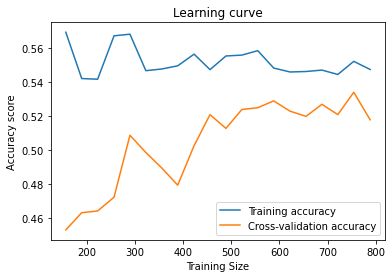

In [45]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [46]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [103]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.5011820330969267
F1 score micro: 0.5011820330969267
F1 score binary: 0.48157248157248156

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52       211
         1.0       0.50      0.46      0.48       212

    accuracy                           0.50       423
   macro avg       0.50      0.50      0.50       423
weighted avg       0.50      0.50      0.50       423



[Parallel(n_jobs=-1)]: Done 1988 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    3.8s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


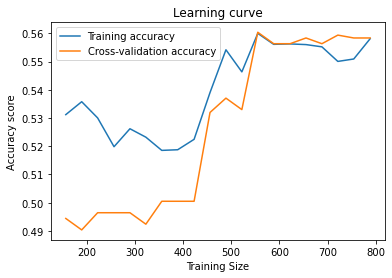

In [47]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [105]:
# learning curve considering different seeds 

In [48]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

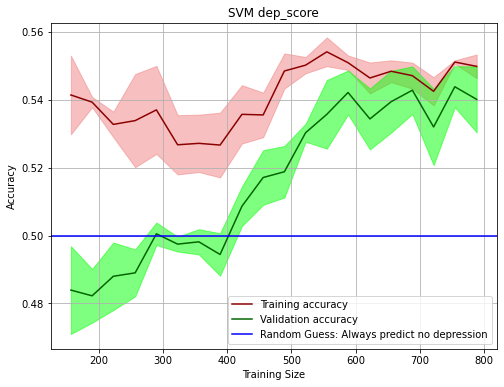

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# KNN

## Seed 100

In [50]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [109]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s


best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'weights': 'uniform'}
Accuracy: 0.4940898345153664
F1 score micro: 0.4940898345153664
F1 score binary: 0.3475609756097561

classification report:
               precision    recall  f1-score   support

         0.0       0.50      0.70      0.59       216
         1.0       0.47      0.28      0.35       207

    accuracy                           0.49       423
   macro avg       0.49      0.49      0.47       423
weighted avg       0.49      0.49      0.47       423



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


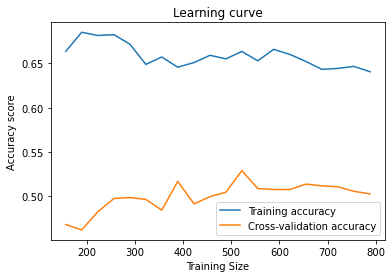

In [51]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='uniform')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [52]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [112]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 100, 'weights': 'uniform'}
Accuracy: 0.4657210401891253
F1 score micro: 0.4657210401891253
F1 score binary: 0.3722222222222222

classification report:
               precision    recall  f1-score   support

         0.0       0.47      0.62      0.53       211
         1.0       0.45      0.32      0.37       212

    accuracy                           0.47       423
   macro avg       0.46      0.47      0.45       423
weighted avg       0.46      0.47      0.45       423



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


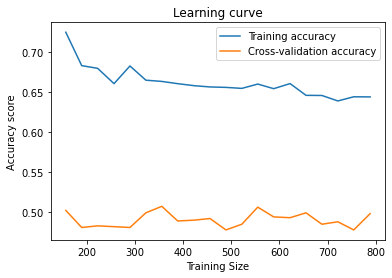

In [53]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, weights='uniform')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [54]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [115]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}
Accuracy: 0.4657210401891253
F1 score micro: 0.4657210401891253
F1 score binary: 0.3615819209039548

classification report:
               precision    recall  f1-score   support

         0.0       0.47      0.63      0.54       211
         1.0       0.45      0.30      0.36       212

    accuracy                           0.47       423
   macro avg       0.46      0.47      0.45       423
weighted avg       0.46      0.47      0.45       423



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


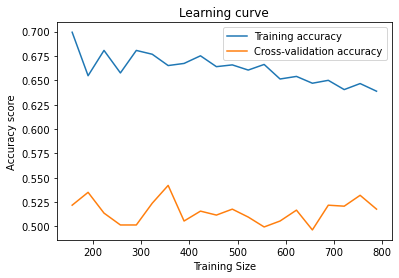

In [55]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [117]:
# learning curve considering different seeds

In [56]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

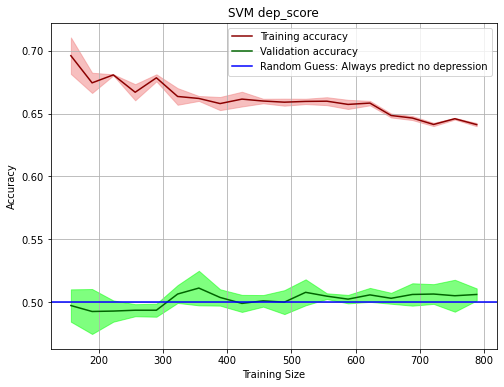

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# Random Forest

## Seed 100

In [ ]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=14, min_samples_split=50, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [ ]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=14, min_samples_split=50, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [ ]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [ ]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=14, min_samples_split=50, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [ ]:
# learning curve considering different seeds

In [ ]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()